CODE WHICH PLOTS GRAPH AS PER NUMBER OF SATELLITES AND OBJECTS WHICH PERFECT DEGREES AND SOURCE AND DESTINATION NODE
It also gives Max flow with different capacities
Added priorities 

In [2]:
pip install gurobipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.1 MB/s eta 0:00:00


In [3]:
pip install --upgrade scipy networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


-------------------------------------------
X-coordinates of Satellites [-150, -250]
Y-coordinates of Satellites [19.431314477049078, 29.540436951612815]
-------------------------------------------
X-coordinates of Objects [41.09410362744072, 21.356246950136082, 23.371682803731197, 15.173386058692529, 30.36205897179407]
Y-coordinates of Objects [21.646316187241133, 6.1413824847799106, 14.419119712429875, -27.154809773259387, 31.789132764062444]
Smallest x coordinate 
[(0, {'pos': (-150, 19.431314477049078), 'priority': 1}), (1, {'pos': (-250, 29.540436951612815), 'priority': 1}), (2, {'pos': (41.09410362744072, 21.646316187241133), 'priority': 2}), (3, {'pos': (21.356246950136082, 6.1413824847799106), 'priority': 3}), (4, {'pos': (23.371682803731197, 14.419119712429875), 'priority': 4}), (5, {'pos': (15.173386058692529, -27.154809773259387), 'priority': 5}), (6, {'pos': (30.36205897179407, 31.789132764062444), 'priority': 6})]
Distance of Satellite 0 and object 0 is 191.10694041230215


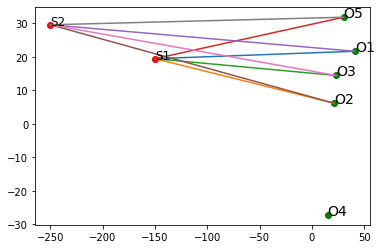

In [4]:
import gurobipy
# from IPython.core.display import set_matplotlib_formats
import numpy as np
import pandas as pd
import gurobipy as gp
import networkx as nx
import random
import math
from math import acos, sqrt, degrees
from gurobipy import *

satellite = 2  # Number of satellites

obj = 5 # Number of objects


#To generate coordinates
satellite_x_list=[]
satellite_y_list=[]
object_x_list=[]
object_y_list=[]
deg_angle_list = []

# Create a directed graph
G = nx.DiGraph()

#To generate satellite coordinates

for i in range(0,satellite):
  satellite_smallest = 100*random.random();
  # satellite_smallest = 100*random.randrange(2,20);
  satellite_x = 50-100*random.randrange(2,4);
  satellite_y = 50-100*random.random();
  satellite_x_list.append(satellite_x)
  satellite_y_list.append(satellite_y)
  satellite_x_largest = max(satellite_x_list)
print("-------------------------------------------")
print("X-coordinates of Satellites",satellite_x_list)
print("Y-coordinates of Satellites",satellite_y_list)

#To generate Object coordinates

for j in range(0,obj):
  object_x = 100*random.random();
  # object_x = 100*random.randrange(-20,-2);
  while object_x < satellite_x_largest:
    object_x = 50-100*random.randrange(-20,-2);
  object_y = 50-100*random.random();
  object_x_list.append(object_x)
  object_y_list.append(object_y)
print("-------------------------------------------")
print("X-coordinates of Objects",object_x_list)
print("Y-coordinates of Objects",object_y_list)

print("Smallest x coordinate ")
# print("-------------------------------------------")

# To plot graph

import matplotlib.pyplot as plt

plt.scatter(satellite_x_list, satellite_y_list,c='r')
plt.scatter(object_x_list, object_y_list,c='g')

#To label scatter plots
for i in range(satellite):
  label = "S"+str(i+1)
  plt.text(x=satellite_x_list[i],y=satellite_y_list[i],s=label,fontdict=dict(color='black',size=12))

for i in range(obj):
  label = "O"+str(i+1)
  plt.text(x=object_x_list[i],y=object_y_list[i],s=label,fontdict=dict(color='black',size=14))

# Add nodes to the graph
for si in range(satellite):
    G.add_node(si, pos=(satellite_x_list[si], satellite_y_list[si]),priority = 1)

for oj in range(obj):
    G.add_node(satellite+oj, pos=(object_x_list[oj], object_y_list[oj]),priority = oj+2)

print(G.nodes(data=True))

for i in range(satellite):
  for j in range(obj):
    # Calculating Distance 
    dist = math.sqrt( (object_x_list[j] - satellite_x_list[i])**2 + (object_y_list[j] - satellite_y_list[i])**2 )
    print("Distance of Satellite",i,"and object",j,"is",dist)

    #Calculating angle
    angle = math.atan2(object_y_list[j]-satellite_y_list[i], object_x_list[j]-satellite_x_list[i])

    #Convert to degrees
    deg_angle = degrees(angle)
    print("Angle of Satellite",i,"and object",j,"is",deg_angle)


# To define the type based on angle - TYPE 1
    if -22.5 < deg_angle < 22.5:
      print("Type 1")
      angle_rng = 45  
      # Detecting object based on Angle
        # to find probability
      p_angle = (1-(2*abs(deg_angle)/angle_rng))  
      # print("Prob of angle is:",p_angle)
      #to find distance range
      distance_rng = ((angle_rng/deg_angle)**2)*10  

      # Detecting object based on Distance
      if dist > distance_rng:
        p_dis = 0
        print("Probabilty of dist detecting is:",p_dis)
      else:
        # print("Distance range",distance_rng)
        p_dis = (1-(dist/distance_rng))
        # print("Prob of dist is:",p_dis)
        p = p_angle * p_dis
        print("Probability of detecting object is:",p)
        plt.plot([satellite_x_list[i], object_x_list[j]], [satellite_y_list[i], object_y_list[j]])
        # Add edges to graph
        G.add_edge(i, j+satellite)
      print("-----------------------------")


# To define the type based on angle - TYPE 2
    elif -45 < deg_angle < 45:
      print("Type 2")
      angle_rng = 90 
      # Detecting object based on Angle
      # to find probability
      p_angle = (1-(2*abs(deg_angle)/angle_rng))  
      # print("Prob of angle is:",p_angle)
      #to find distance range
      distance_rng = ((angle_rng/deg_angle)**2)*10

      # Detecting object based on Distance
      if dist > distance_rng:
        p_dis = 0
        print("Probabilty of dist detecting is:",p_dis)
      else:
        # print("Distance range",distance_rng)
        p_dis = (1-(dist/distance_rng))
        # print("Prob of dist is:",p_dis)
        p = p_angle * p_dis
        print("Probability of detecting object is:",p)
        plt.plot([satellite_x_list[i], object_x_list[j]], [satellite_y_list[i], object_y_list[j]])
        # Add edges to graph
        G.add_edge(i, j+satellite)
      print("-----------------------------")


# To define the type based on angle - TYPE 3
    elif -67.5 < deg_angle < 67.5:
      print("Type 3")
      angle_rng = 135
      # Detecting object based on Angle
      # to find probability
      p_angle = (1-(2*abs(deg_angle)/angle_rng))  
      # print("Prob of angle is:",p_angle)
      #to find distance range
      distance_rng = ((angle_rng/deg_angle)**2)*10

      # Detecting object based on Distance
      if dist > distance_rng:
        p_dis = 0
        print("Probabilty of dist detecting is:",p_dis)
      else:
        # print("Distance range",distance_rng)
        p_dis = (1-(dist/distance_rng))
        # print("Prob of dist is:",p_dis)
        p = p_angle * p_dis
        print("Probability of detecting object is:",p)
        plt.plot([satellite_x_list[i], object_x_list[j]], [satellite_y_list[i], object_y_list[j]])
        # Add edges to graph
        G.add_edge(i, j+satellite)
      print("-----------------------------")

      
# To define the type based on angle - TYPE 4
    elif -90 < deg_angle < 90:
      print("Type 4")
      angle_rng = 180
      # Detecting object based on Angle
      # to find probability
      p_angle = (1-(2*abs(deg_angle)/angle_rng))  
      # print("Prob of angle is:",p_angle)
      #to find distance range
      distance_rng = ((angle_rng/deg_angle)**2)*10

      # Detecting object based on Distance
      if dist > distance_rng:
        p_dis = 0
        print("Probabilty of dist detecting is:",p_dis)
      else:
        # print("Distance range",distance_rng)
        p_dis = (1-(dist/distance_rng))
        # print("Prob of dist is:",p_dis)
        p = p_angle * p_dis
        print("Probability of detecting object is:",p)
        plt.plot([satellite_x_list[i], object_x_list[j]], [satellite_y_list[i], object_y_list[j]])
        # Add edges to graph
        G.add_edge(i, j+satellite)
      print("-----------------------------")

print("graph is:",G.edges())
print(G)
print(G.nodes(data=True))


# #     # print("Probability of Satellite",i,"and object",j,"is",prob)
# #     print("               ")
    # deg_angle_list.append(deg_angle)
    # print("List of degree angle:",deg_angle_list1)
# # print("Max of degree angle is",max_degree_angle)    


# # Create optimization model

# model = gurobipy.Model('trymodel')

# # Create decision variables to represent the probability of detecting an object
# dvar = model.addVars(satellite, obj, vtype=gurobipy.GRB.INTEGER)

# # # Calculate the total probability of detecting all objects
# # detection_prob = gp.quicksum(dvar[i, j] for i in range(satellite) for j in range(obj))
# # print("It is:",detection_prob)

# # Set the objective function to maximize the total probability of detecting all objects
# model.setObjective(dvar.sum(), gurobipy.GRB.MAXIMIZE)

# # Constrain each object to be detected by at least one satellite
# model.addConstrs(dvar.sum(j, '*') >= 1 for j in range(obj))

# # Optimize the model
# model.optimize()

# Results
# for i in range(satellite):
#     for j in range(obj):
#         print("Probability of satellite", i, "detecting object", j, ":", dvar[i, j])


# model.optimize
# print(model.display())



In [ ]:
# Calculating mean of Y coordinates
mean_s_y=sum(satellite_y_list)/len(satellite_y_list)
# print("Mean of y-coord of satellite:",mean_s_y)

# print(object_y_list)
mean_o_y=sum(object_y_list)/len(object_y_list)
print("Mean of y-coord of object:",mean_o_y)

#Source node coordinates
min_x_s=min(satellite_x_list)

delta_x = 30

# Create the dummy node coordinate
source_coord = (min_x_s - delta_x, mean_s_y)

# Add the dummy node coordinate to the beginning of the satellite list
# satellite_coords.insert(0, dummy_coord)

# Print the updated list of coordinates
print(source_coord)

#Destination node coordinates
max_x_o=max(object_x_list)

delta_x = 20

# Create the dummy node coordinate
dest_coord = (max_x_o + delta_x, mean_o_y)

# Add the dummy node coordinate to the beginning of the satellite list
# satellite_coords.insert(0, dummy_coord)

# Print the updated list of coordinates
print(dest_coord)


Mean of y-coord of object: 20.03836811040582
(-180, -1.251042304234172)
(106.95268670571579, 20.03836811040582)


In [ ]:
out_degree_list = []
in_degree_list = []

nodes_list = G.nodes()
no_of_nodes = len(nodes_list)
# print(no_of_nodes)

# add nodes to the graph
G.add_nodes_from(range(1, no_of_nodes+1))

# add a dummy source node (id=0) and connect it to all satellite nodes
G.add_node(no_of_nodes,pos=source_coord,priority = 1)
G.add_edges_from([(no_of_nodes, i) for i in range(satellite)])

# add a dummy destination node (id=n+1) and connect all object nodes to it
G.add_node(no_of_nodes+1,pos=dest_coord,priority = 8)
G.add_edges_from([(j+satellite,no_of_nodes+1) for j in range(obj)])
# print(G)


print(G.nodes(data=True))

nodes_list_u = G.nodes()
updated_list=len(nodes_list_u)
# print(updated_list)
# Calculate outdegree and indegree counts for each node
out_degree_counts = G.out_degree()
in_degree_counts = G.in_degree()

# Print the outdegree and indegree counts for each node
for i in range(updated_list):
    out_degree = out_degree_counts[i]
    in_degree = in_degree_counts[i]
    out_degree_list.append(out_degree)
    in_degree_list.append(in_degree)
    # in_degree = in_degree_counts[i+1]
    print(f"Node {i}: outdegree={out_degree}, indegree={in_degree}")


[(0, {'pos': (-150, -32.82573265395989), 'priority': 1}), (1, {'pos': (-150, 30.323648045491545), 'priority': 1}), (2, {'pos': (48.11733769438125, 5.986907923266536), 'priority': 2}), (3, {'pos': (82.75070798986222, 25.863578573279955), 'priority': 3}), (4, {'pos': (58.54435649164088, 6.18753110060274), 'priority': 4}), (5, {'pos': (16.87126519751545, 23.32164260552576), 'priority': 5}), (6, {'pos': (86.95268670571579, 38.8321803493541), 'priority': 6}), (7, {'pos': (-180, -1.251042304234172), 'priority': 1}), (8, {'pos': (106.95268670571579, 20.03836811040582), 'priority': 8})]
Node 0: outdegree=0, indegree=1
Node 1: outdegree=5, indegree=1
Node 2: outdegree=1, indegree=1
Node 3: outdegree=1, indegree=1
Node 4: outdegree=1, indegree=1
Node 5: outdegree=1, indegree=1
Node 6: outdegree=1, indegree=1
Node 7: outdegree=2, indegree=0
Node 8: outdegree=0, indegree=5


In [ ]:
print(out_degree_list)
print(in_degree_list)

[0, 5, 1, 1, 1, 1, 1, 2, 0]
[1, 1, 1, 1, 1, 1, 1, 0, 5]


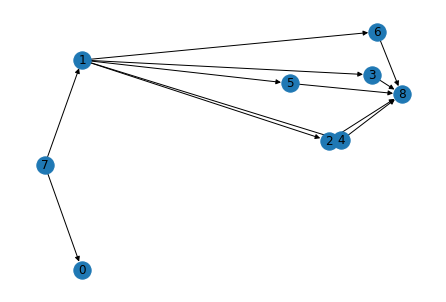

In [ ]:
import matplotlib.pyplot as plt


# draw the graph using NetworkX
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos=pos, with_labels=True)

# show the plot
plt.show()


In [ ]:
priority_list=[]
for node in G.nodes():
    priority = G.nodes[node]['priority']
    priority_list.append(priority)
    print("Priority of node", node, "is", priority)
# print(priority_list)

Priority of node 0 is 1
Priority of node 1 is 1
Priority of node 2 is 2
Priority of node 3 is 3
Priority of node 4 is 4
Priority of node 5 is 5
Priority of node 6 is 6
Priority of node 7 is 1
Priority of node 8 is 8


In [ ]:
capacity=[]
i=1
for i in range(updated_list):
  capacity.append(i+1)
  # print(capacity)

# capacity = [3,3,3,3,3,3,3,3]
edge_capacity = [(i, j, capacity[i]) for (i, j) in G.edges()]
updated_edge_capacity = [(i, j, capacity[i]*priority_list[node]) for (i, j) in G.edges()]
print(edge_capacity)
print(updated_edge_capacity)

[(1, 2, 2), (1, 3, 2), (1, 4, 2), (1, 5, 2), (1, 6, 2), (2, 8, 3), (3, 8, 4), (4, 8, 5), (5, 8, 6), (6, 8, 7), (7, 0, 8), (7, 1, 8)]
[(1, 2, 16), (1, 3, 16), (1, 4, 16), (1, 5, 16), (1, 6, 16), (2, 8, 24), (3, 8, 32), (4, 8, 40), (5, 8, 48), (6, 8, 56), (7, 0, 64), (7, 1, 64)]


In [ ]:
# A Python implementation of the Ford-Fulkerson algorithm
# for finding the maximum flow in a flow network.

from collections import deque

# Returns true if there is a path from source to sink in
# residual graph. Also fills parent[] to store the path
def bfs(graph, source, sink, parent):
    
    # Mark all the vertices as not visited
    visited = [False] * len(graph)
    
    # Create a queue for BFS
    queue = deque()
    
    # Mark the source node as visited and enqueue it
    queue.append(source)
    visited[source] = True
    
    # Standard BFS Loop
    while queue:
        
        # Dequeue a vertex from queue and print it
        u = queue.popleft()
        
        # Get all adjacent vertices of the dequeued vertex u
        # If a adjacent has not been visited, then mark it
        # visited and enqueue it
        for ind, val in enumerate(graph[u]):
            if visited[ind] == False and val > 0 :
                queue.append(ind)
                visited[ind] = True
                parent[ind] = u
    
    # If we can reach sink in BFS starting from source then
    # return true else false
    return True if visited[sink] else False
 
 
# Returns the maximum flow from source to sink in the given graph
def ford_fulkerson(graph, source, sink):
    
    # This array is filled by BFS and to store path
    parent = [-1] * len(graph)
 
    max_flow = 0  # There is no flow initially
 
    # Augument the flow while there is path from source to sink
    while bfs(graph, source, sink, parent) :
 
        # Find minimum residual capacity of the edges along the
        # path filled by BFS. Or we can say find the maximum flow
        # through the path found.
        path_flow = float("Inf")
        s = sink
        while(s != source):
            path_flow = min(path_flow, graph[parent[s]][s])
            s = parent[s]
 
        # Add path flow to overall flow
        max_flow +=  path_flow
 
        # update residual capacities of the edges and reverse edges
        # along the path
        v = sink
        while(v !=  source):
            u = parent[v]
            graph[u][v] -= path_flow
            graph[v][u] += path_flow
            v = parent[v]
 
    # return maximum flow
    return max_flow


In [ ]:
# WITHOUT PRIORITIES
# Determine the number of vertices in the graph
V = max(max(u, v) for u, v, _ in edge_capacity) + 1

# Create an empty adjacency matrix filled with zeros
graph = [[0] * V for _ in range(V)]

# Update the matrix with the capacities of the edges
for u, v, capacity in edge_capacity:
    graph[u][v] = capacity

print(graph)
 

[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2, 2, 2, 2, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3], [0, 0, 0, 0, 0, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 0, 0, 5], [0, 0, 0, 0, 0, 0, 0, 0, 6], [0, 0, 0, 0, 0, 0, 0, 0, 7], [8, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [ ]:
# WITH PRIORITIES
# Determine the number of vertices in the graph
V = max(max(u, v) for u, v, _ in updated_edge_capacity) + 1

# Create an empty adjacency matrix filled with zeros
updated_graph = [[0] * V for _ in range(V)]

# Update the matrix with the capacities of the edges
for u, v, capacity in updated_edge_capacity:
    updated_graph[u][v] = capacity

print(updated_graph)
 

[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 16, 16, 16, 16, 16, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 24], [0, 0, 0, 0, 0, 0, 0, 0, 32], [0, 0, 0, 0, 0, 0, 0, 0, 40], [0, 0, 0, 0, 0, 0, 0, 0, 48], [0, 0, 0, 0, 0, 0, 0, 0, 56], [64, 64, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [ ]:
# WITHOUT PRIORITIES
source = updated_list-2
sink = updated_list-1
max_flow = ford_fulkerson(graph, source, sink)

# print the maximum flow
print("Maximum flow:", max_flow)


Maximum flow: 8


In [ ]:
# WITH PRIORITIES
source = updated_list-2
sink = updated_list-1
max_flow = ford_fulkerson(updated_graph, source, sink)

# print the maximum flow
print("Maximum flow:", max_flow)


Maximum flow: 64
